# Заняття 4

## Мета:
Розробити просту згорткову нейронну мережу (CNN) для класифікації зображень або рекурентну нейронну мережу (RNN) для генерації тексту.

## Кроки для виконання завдання:

### 1. Завантаження та попередня обробка зображень для CNN:
- Завантажте набір даних (наприклад, CIFAR-10, MNIST, або інший публічний датасет для зображень). Та розділіть його на навчальну та тестову вибірки.
- Нормалізуйте значення пікселів до діапазону [0, 1].
- Якщо необхідно, виконайте перетворення даних, такі як обрізання, повороти або віддзеркалення для збільшення кількості навчальних зображень (augmentation).


### 2. Попередня обробка тексту для RNN:
- Завантажте текстовий корпус та перетворіть його у послідовність символів або слів.
- Створіть словник для перетворення символів або слів у числові індекси.
- Розбийте текст на короткі фрагменти (наприклад, послідовності по 100 символів або слів), які будуть використовуватися як вхідні дані для RNN.


### 3. Створення архітектури CNN:
- Побудуйте просту CNN з кількох згорткових шарів (`Conv2D`) з функціями активації `ReLU`.
- Додайте шари підсемплювання (`MaxPooling2D`) після згорткових шарів для зменшення розміру.
- Розгорніть результати згорткових шарів (`Flatten`) і додайте один або більше повнозв’язаних шарів (`Dense`).
- Вихідний шар із `softmax` для класифікації зображень на категорії.


### 4. Створення архітектури RNN:
- Визначте рекурентну нейронну мережу, використовуючи шари `LSTM` або `GRU` (в залежності від обраної бібліотеки).
- Додайте один або більше рекурентних шарів з вибраною кількістю нейронів у кожному шарі.
- Додайте повнозв’язаний шар із `softmax` для прогнозування ймовірностей наступних символів або слів.


### 5. Наступні кроки схожі до минулих занять.


## Формат виконання:
- **`.ipynb` блокнот** з кодом та візуалізацією.
- Або ж код в **`.py`** з прикріпленими зображеннями результатів на гітхабі.


## Домашнє завдання:

### Initialization

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### Data initialization

Підготуємо дані Fashion-MNIST для подальшого використання в навчанні згорткової нейронної мережі (CNN):

1. Визначимо розмір батчу (пакету) даних, який буде використовуватися при навчанні моделі.

2. Створимо набір трансформацій, які будуть застосовані до зображень. Зображення перетворюються в тензори і нормалізуються.

3. Завантажимо навчальний та тестовий набори даних Fashion-MNIST. Дані будуть автоматично завантажені, якщо їх немає локально.

4. Створимо об'єкти DataLoader для навчального та тестового наборів даних. Вони дозволяють ефективно завантажувати дані батчами під час навчання та тестування моделі.


In [3]:
batch_size = 64

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),  # Нормалізація для Fashion-MNIST
    ]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Import base neural network class

In [4]:
import sys

sys.path.append("../../classes")

from base_neural_net import BaseNeuralNet

### Modesls

#### CNN

Клас `FashionMNIST_CNN` визначає згорткову нейронну мережу для класифікації зображень Fashion-MNIST:

1. Архітектура мережі:
   - Два згорткових шари (`conv1`, `conv2`) з ReLU активацією та пулінгом.
   - Шар вирівнювання для переходу від 2D до 1D представлення.
   - Два повнозв'язних шари (`fc1`, `fc2`) для класифікації.

2. Метод `forward`:
   - Послідовно застосовує шари мережі до вхідних даних.
   - Використовує ReLU активацію та максимальний пулінг після згорткових шарів.
   - Вирівнює дані перед повнозв'язними шарами.
   - Повертає вихідні дані для 10 класів Fashion-MNIST.


In [8]:
class FashionMNIST_CNN(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist", dropout_rate=0.0):
        super().__init__(tags=tags,  dropout_rate=dropout_rate)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Learning loop

#### FashionMNIST_CNN

1. Створення моделі:
   - Ініціалізується модель `FashionMNIST_CNN` з тегами, що відображають параметри навчання.

2. Ініціалізація даних:
   - Встановлюються навчальний та тестовий набори даних.
   - Ініціалізуються завантажувачі даних (data loaders).

3. Навчання моделі:
   - Запускається процес навчання з заданими параметрами:
     - 10 епох
     - Швидкість навчання (learning rate) 0.001
     - Регуляризація L2 (weight decay) 1e-4
     - Раннє зупинення (early stopping) з терпінням 3 епохи

4. Збереження моделі:
   - Навчена модель зберігається з версією "1.0.0".


Epoch 1/10, Train Loss: 0.4326, Test Loss: 0.3574, Accuracy: 0.8682
Epoch 2/10, Train Loss: 0.2758, Test Loss: 0.2839, Accuracy: 0.8991
Epoch 3/10, Train Loss: 0.2340, Test Loss: 0.2726, Accuracy: 0.9004
Epoch 4/10, Train Loss: 0.2048, Test Loss: 0.2425, Accuracy: 0.9124
Epoch 5/10, Train Loss: 0.1809, Test Loss: 0.2270, Accuracy: 0.9165
Epoch 6/10, Train Loss: 0.1615, Test Loss: 0.2387, Accuracy: 0.9167
Epoch 7/10, Train Loss: 0.1442, Test Loss: 0.2422, Accuracy: 0.9151
Early stopping triggered at epoch 8


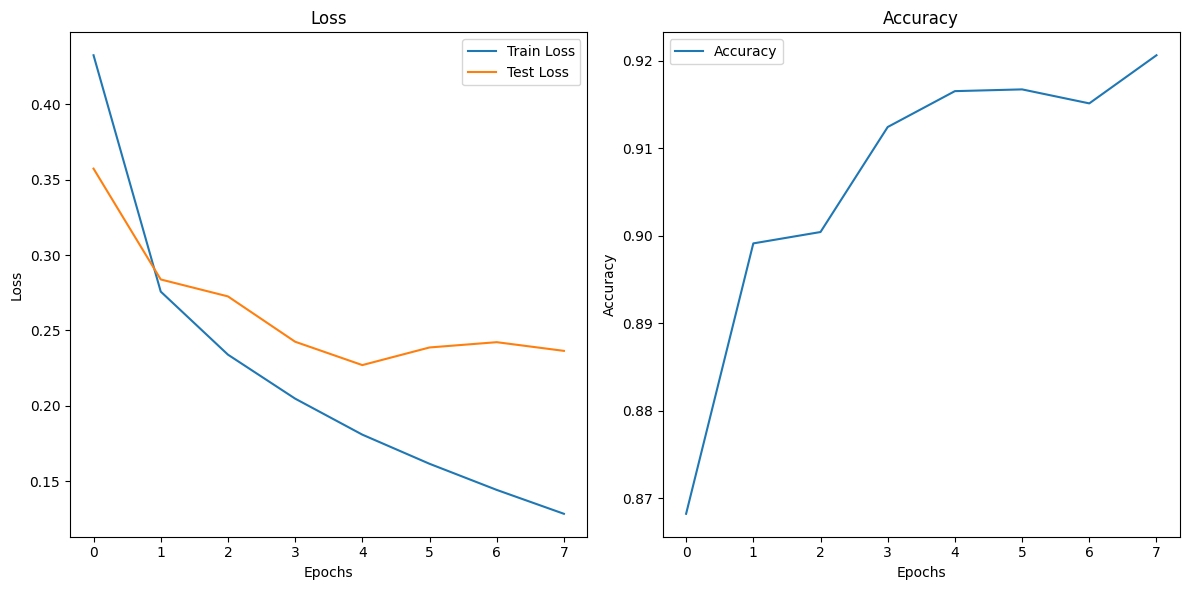

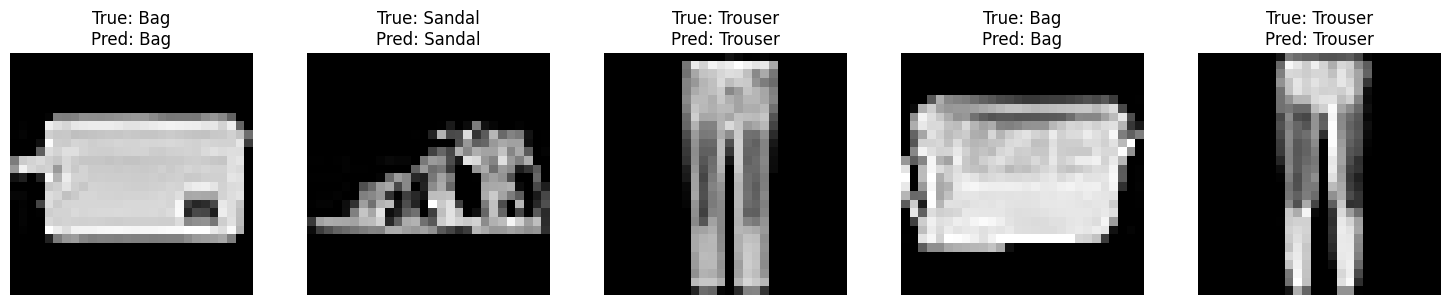

Accuracy for T-shirt/top: 87.20%
Accuracy for Trouser: 99.00%
Accuracy for Pullover: 84.40%
Accuracy for Dress: 95.60%
Accuracy for Coat: 87.90%
Accuracy for Sandal: 97.30%
Accuracy for Shirt: 76.10%
Accuracy for Sneaker: 96.70%
Accuracy for Bag: 98.40%
Accuracy for Ankle boot: 98.00%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3__v1.0.0.pth


In [7]:
fashion_mnist_cnn = FashionMNIST_CNN(tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3")
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

1. Створення моделі:
   - Ініціалізується модель `FashionMNIST_CNN` з тегами, що відображають параметри навчання, включаючи швидкість навчання, регуляризацію та використання Dropout.

2. Ініціалізація даних:
   - Встановлюються навчальний та тестовий набори даних.
   - Ініціалізуються завантажувачі даних (data loaders).

3. Навчання моделі:
   - Запускається процес навчання з заданими параметрами:
     - 25 епох
     - Швидкість навчання (learning rate) 0.001
     - Регуляризація L2 (weight decay) 1e-4
     - Раннє зупинення (early stopping) з терпінням 5 епох

4. Збереження моделі:
   - Навчена модель зберігається з версією "1.0.0".

Epoch 1/25, Train Loss: 0.4375, Test Loss: 0.3369, Accuracy: 0.8805
Epoch 2/25, Train Loss: 0.2805, Test Loss: 0.2853, Accuracy: 0.8946
Epoch 3/25, Train Loss: 0.2359, Test Loss: 0.2494, Accuracy: 0.9109
Epoch 4/25, Train Loss: 0.2064, Test Loss: 0.2454, Accuracy: 0.9109
Epoch 5/25, Train Loss: 0.1819, Test Loss: 0.2328, Accuracy: 0.9200
Epoch 6/25, Train Loss: 0.1633, Test Loss: 0.2373, Accuracy: 0.9178
Epoch 7/25, Train Loss: 0.1457, Test Loss: 0.2400, Accuracy: 0.9197
Epoch 8/25, Train Loss: 0.1304, Test Loss: 0.2412, Accuracy: 0.9196
Epoch 9/25, Train Loss: 0.1183, Test Loss: 0.2512, Accuracy: 0.9172
Early stopping triggered at epoch 10


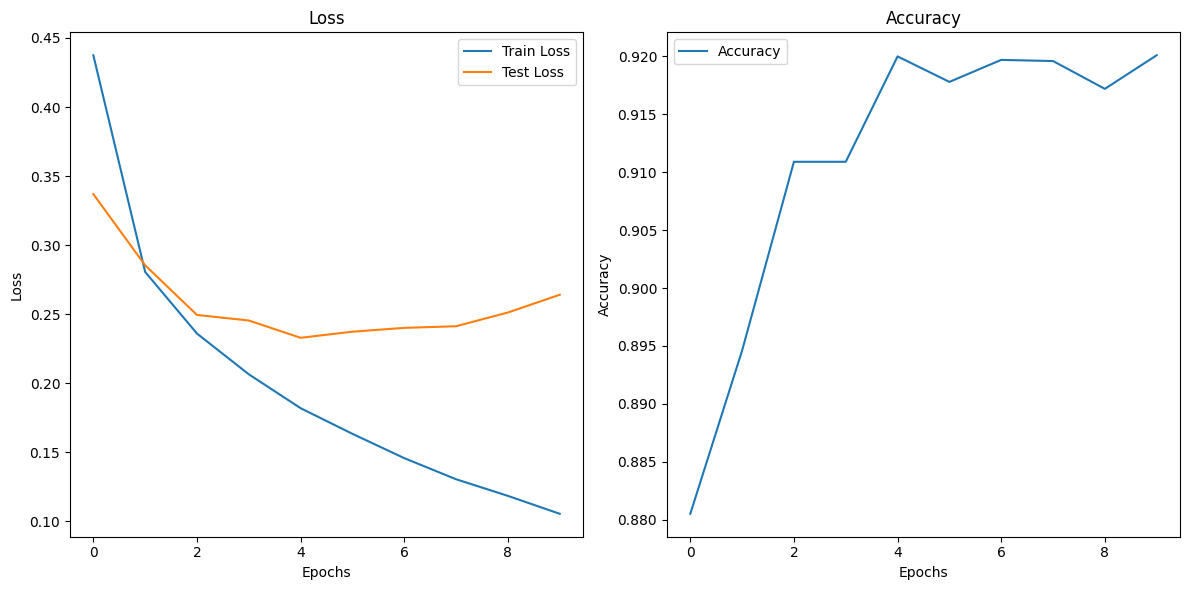

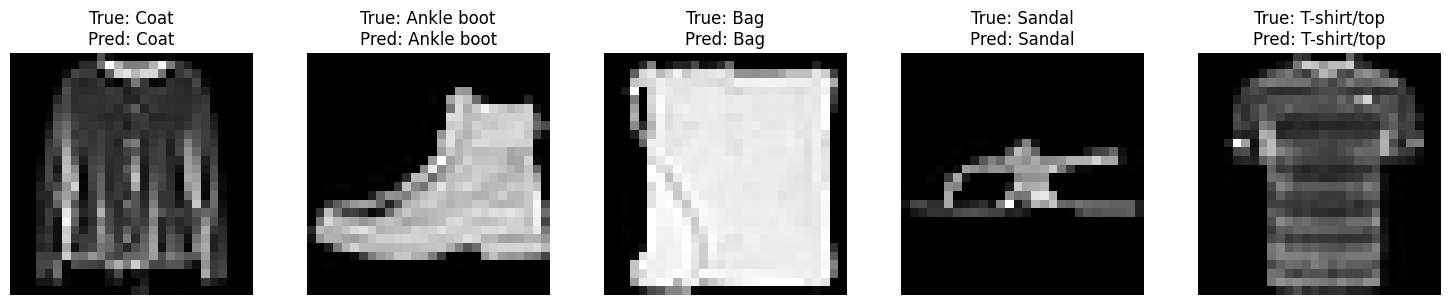

Accuracy for T-shirt/top: 92.80%
Accuracy for Trouser: 99.30%
Accuracy for Pullover: 90.30%
Accuracy for Dress: 89.40%
Accuracy for Coat: 91.30%
Accuracy for Sandal: 98.40%
Accuracy for Shirt: 67.30%
Accuracy for Sneaker: 98.10%
Accuracy for Bag: 98.50%
Accuracy for Ankle boot: 94.70%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=25-lr=0001-wd=00001-es=5__v1.0.0.pth


In [32]:
fashion_mnist_cnn = FashionMNIST_CNN(
    tags="cnn/fashion_mnist/e=25/lr=0001/wd=00001/es=5"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=25, lr=0.001, weight_decay=1e-4, early_stopping_patience=5
)

fashion_mnist_cnn.save_model(version="1.0.0")


1. **Створення моделі:**
   - Ініціалізується модель `FashionMNIST_CNN` з параметрами, що включають теги для ідентифікації моделі та швидкість Dropout (0.5).

2. **Ініціалізація даних:**
   - Встановлюються навчальний та тестовий набори даних.
   - Ініціалізуються завантажувачі даних (data loaders) для ефективного завантаження даних під час навчання та тестування.

3. **Навчання моделі:**
   - Запускається процес навчання з наступними параметрами:
     - 25 епох
     - Швидкість навчання (learning rate) 0.001
     - Регуляризація L2 (weight decay) 1e-4
     - Раннє зупинення (early stopping) з терпінням 5 епох

4. **Збереження моделі:**
   - Навчена модель зберігається з версією "1.0.0".

Epoch 1/25, Train Loss: 1.1957, Test Loss: 0.3803, Accuracy: 0.8737
Epoch 2/25, Train Loss: 1.0803, Test Loss: 0.3102, Accuracy: 0.8984
Epoch 3/25, Train Loss: 1.0411, Test Loss: 0.3047, Accuracy: 0.9036
Epoch 4/25, Train Loss: 1.0192, Test Loss: 0.2823, Accuracy: 0.9099
Epoch 5/25, Train Loss: 1.0009, Test Loss: 0.2778, Accuracy: 0.9041
Epoch 6/25, Train Loss: 0.9921, Test Loss: 0.2641, Accuracy: 0.9166
Epoch 7/25, Train Loss: 0.9760, Test Loss: 0.2558, Accuracy: 0.9194
Epoch 8/25, Train Loss: 0.9744, Test Loss: 0.2329, Accuracy: 0.9201
Epoch 9/25, Train Loss: 0.9600, Test Loss: 0.2325, Accuracy: 0.9196
Epoch 10/25, Train Loss: 0.9614, Test Loss: 0.2355, Accuracy: 0.9168
Epoch 11/25, Train Loss: 0.9444, Test Loss: 0.2202, Accuracy: 0.9239
Epoch 12/25, Train Loss: 0.9460, Test Loss: 0.2377, Accuracy: 0.9170
Epoch 13/25, Train Loss: 0.9449, Test Loss: 0.2385, Accuracy: 0.9209
Epoch 14/25, Train Loss: 0.9271, Test Loss: 0.2243, Accuracy: 0.9254
Epoch 15/25, Train Loss: 0.9189, Test Loss:

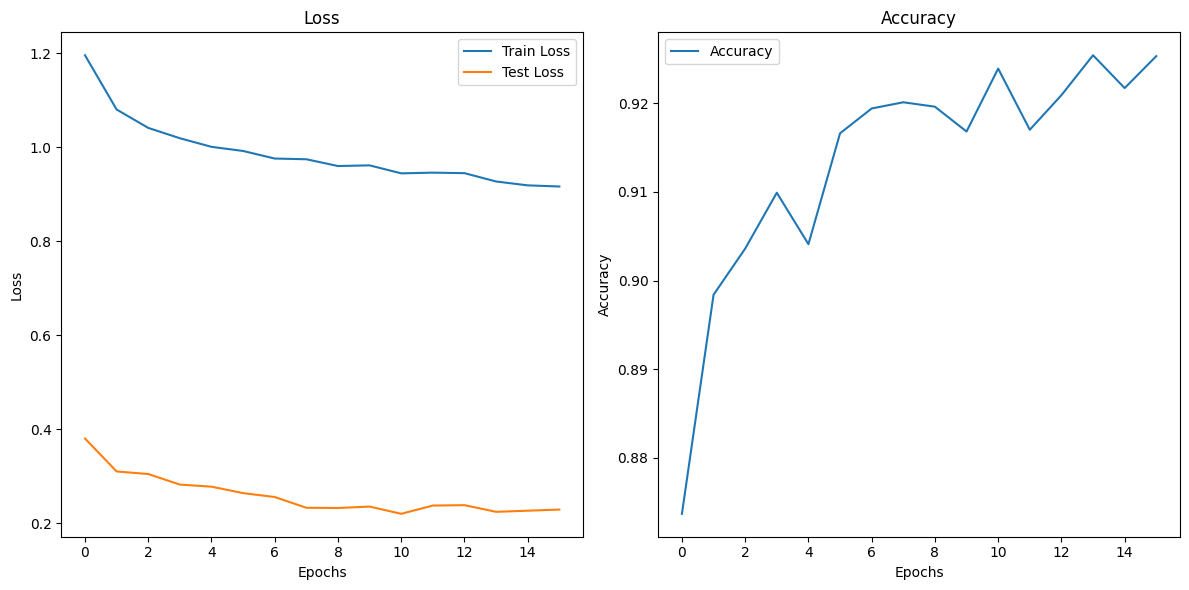

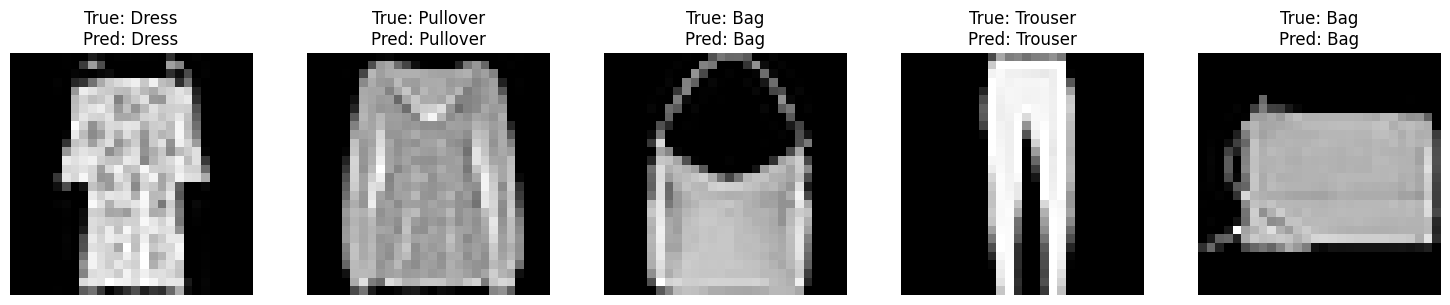

Accuracy for T-shirt/top: 87.80%
Accuracy for Trouser: 98.20%
Accuracy for Pullover: 91.90%
Accuracy for Dress: 93.20%
Accuracy for Coat: 89.70%
Accuracy for Sandal: 97.50%
Accuracy for Shirt: 74.30%
Accuracy for Sneaker: 98.60%
Accuracy for Bag: 98.50%
Accuracy for Ankle boot: 95.60%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=25-lr=0001-wd=00001-es=5-dr=05__v1.0.0.pth


In [9]:
fashion_mnist_cnn = FashionMNIST_CNN(
    tags="cnn/fashion_mnist/e=25/lr=0001/wd=00001/es=5/dr=05", dropout_rate=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=25, lr=0.001, weight_decay=1e-4, early_stopping_patience=5
)

fashion_mnist_cnn.save_model(version="1.0.0")

#### FashionMNIST_CNN_SM

Клас `FashionMNIST_CNN_SM` визначає згорткову нейронну мережу для класифікації зображень Fashion-MNIST:

1. Архітектура мережі:
   - Два згорткових шари (`conv1`, `conv2`) з ReLU активацією та пулінгом.
   - Шар вирівнювання для переходу від 2D до 1D представлення.
   - Два повнозв'язних шари (`fc1`, `fc2`) для класифікації.

2. Метод `forward`:
   - Послідовно застосовує шари мережі до вхідних даних.
   - Використовує ReLU активацію та максимальний пулінг після згорткових шарів.
   - Вирівнює дані перед повнозв'язними шарами.
   - Повертає ймовірності для 10 класів Fashion-MNIST, використовуючи softmax.

In [11]:
class FashionMNIST_CNN_SM(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist", dropout_rate=0.0):
        super().__init__(tags=tags, dropout_rate=dropout_rate)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

1. **Створення моделі:**
   - Ініціалізується модель `FashionMNIST_CNN_SM` з параметрами, що включають теги для ідентифікації моделі, такі як кількість епох, швидкість навчання, коефіцієнт регуляризації та терпимість до ранньої зупинки.

2. **Ініціалізація даних:**
   - Встановлюються навчальний та тестовий набори даних.
   - Ініціалізуються завантажувачі даних (data loaders) для ефективного завантаження даних під час навчання та тестування.

3. **Навчання моделі:**
   - Запускається процес навчання з наступними параметрами:
     - 10 епох
     - Швидкість навчання (learning rate) 0.001
     - Регуляризація L2 (weight decay) 1e-4
     - Раннє зупинення (early stopping) з терпінням 3 епохи

4. **Збереження моделі:**
   - Навчена модель зберігається з версією "1.0.0".

Epoch 1/10, Train Loss: 1.7001, Test Loss: 1.6285, Accuracy: 0.8362
Epoch 2/10, Train Loss: 1.6008, Test Loss: 1.5889, Accuracy: 0.8731
Epoch 3/10, Train Loss: 1.5834, Test Loss: 1.5828, Accuracy: 0.8794
Epoch 4/10, Train Loss: 1.5723, Test Loss: 1.5848, Accuracy: 0.8762
Epoch 5/10, Train Loss: 1.5645, Test Loss: 1.5785, Accuracy: 0.8837
Epoch 6/10, Train Loss: 1.5605, Test Loss: 1.5686, Accuracy: 0.8926
Epoch 7/10, Train Loss: 1.5542, Test Loss: 1.5647, Accuracy: 0.8979
Epoch 8/10, Train Loss: 1.5492, Test Loss: 1.5635, Accuracy: 0.8977
Epoch 9/10, Train Loss: 1.5462, Test Loss: 1.5602, Accuracy: 0.9029
Epoch 10/10, Train Loss: 1.5422, Test Loss: 1.5633, Accuracy: 0.8990


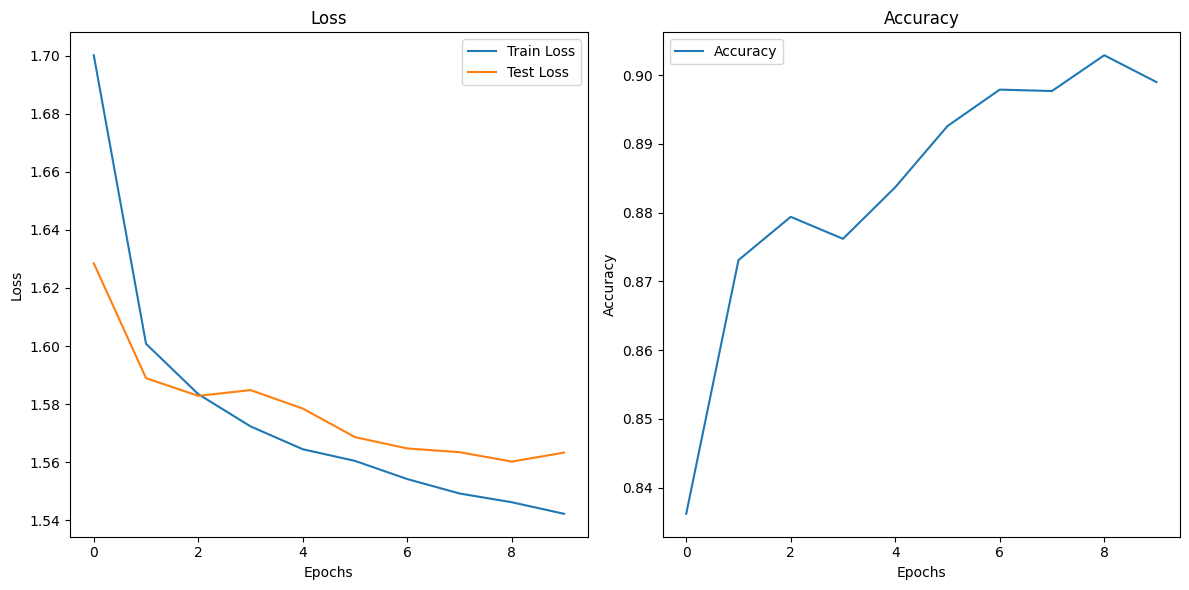

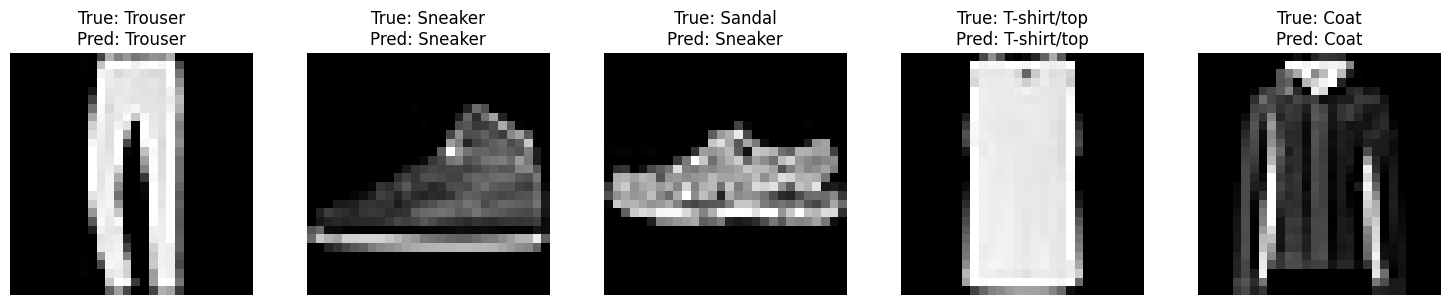

Accuracy for T-shirt/top: 90.50%
Accuracy for Trouser: 98.00%
Accuracy for Pullover: 85.00%
Accuracy for Dress: 92.20%
Accuracy for Coat: 79.60%
Accuracy for Sandal: 95.60%
Accuracy for Shirt: 67.20%
Accuracy for Sneaker: 98.60%
Accuracy for Bag: 97.60%
Accuracy for Ankle boot: 94.70%
Model saved to models/FashionMNIST_CNN_SM__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3__v1.0.0.pth


In [12]:
fashion_mnist_cnn = FashionMNIST_CNN_SM(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

1. **Створення моделі:**
   - Ініціалізується модель `FashionMNIST_CNN_SM` з параметрами, що включають теги для ідентифікації моделі, такі як кількість епох, швидкість навчання, коефіцієнт регуляризації, терпимість до ранньої зупинки, та швидкість Dropout (0.5).

2. **Ініціалізація даних:**
   - Встановлюються навчальний та тестовий набори даних.
   - Ініціалізуються завантажувачі даних (data loaders) для ефективного завантаження даних під час навчання та тестування.

3. **Навчання моделі:**
   - Запускається процес навчання з наступними параметрами:
     - 25 епох
     - Швидкість навчання (learning rate) 0.001
     - Регуляризація L2 (weight decay) 1e-4
     - Раннє зупинення (early stopping) з терпінням 5 епох

4. **Збереження моделі:**
   - Навчена модель зберігається з версією "1.0.0".

Epoch 1/25, Train Loss: 1.7768, Test Loss: 1.6300, Accuracy: 0.8346
Epoch 2/25, Train Loss: 1.6817, Test Loss: 1.5936, Accuracy: 0.8710
Epoch 3/25, Train Loss: 1.6749, Test Loss: 1.5893, Accuracy: 0.8746
Epoch 4/25, Train Loss: 1.6595, Test Loss: 1.5930, Accuracy: 0.8706
Epoch 5/25, Train Loss: 1.6518, Test Loss: 1.5723, Accuracy: 0.8917
Epoch 6/25, Train Loss: 1.6452, Test Loss: 1.5774, Accuracy: 0.8852
Epoch 7/25, Train Loss: 1.6469, Test Loss: 1.5682, Accuracy: 0.8974
Epoch 8/25, Train Loss: 1.6366, Test Loss: 1.5663, Accuracy: 0.8974
Epoch 9/25, Train Loss: 1.6373, Test Loss: 1.5658, Accuracy: 0.8979
Epoch 10/25, Train Loss: 1.6288, Test Loss: 1.5672, Accuracy: 0.8953
Epoch 11/25, Train Loss: 1.6264, Test Loss: 1.5669, Accuracy: 0.8979
Epoch 12/25, Train Loss: 1.6257, Test Loss: 1.5579, Accuracy: 0.9051
Epoch 13/25, Train Loss: 1.6201, Test Loss: 1.5693, Accuracy: 0.8937
Epoch 14/25, Train Loss: 1.6204, Test Loss: 1.5558, Accuracy: 0.9067
Epoch 15/25, Train Loss: 1.6164, Test Loss:

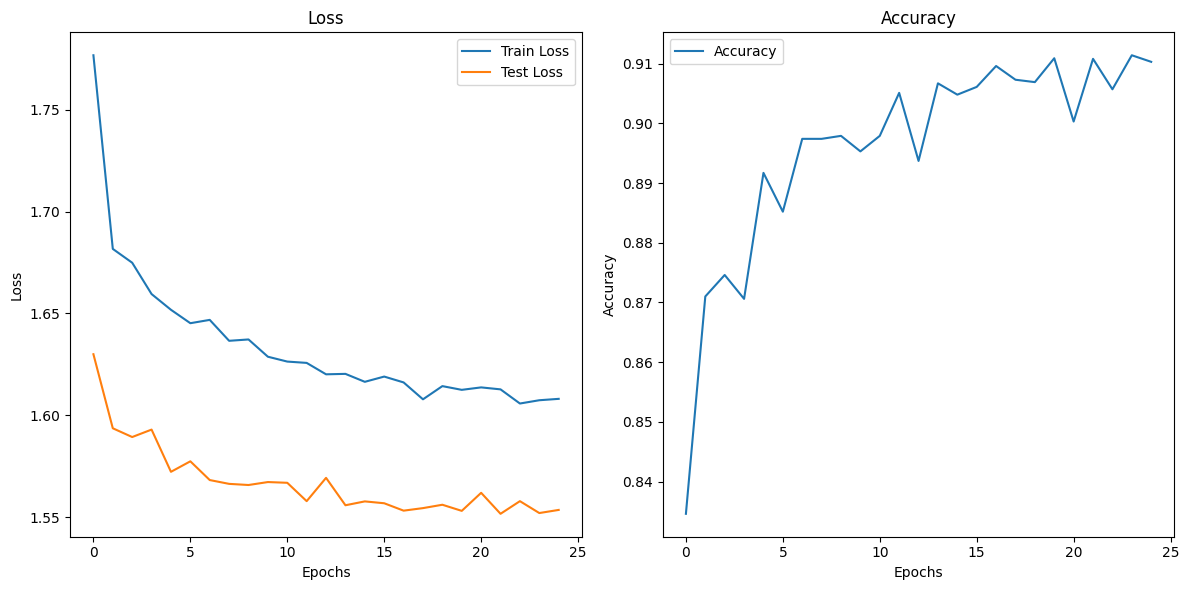

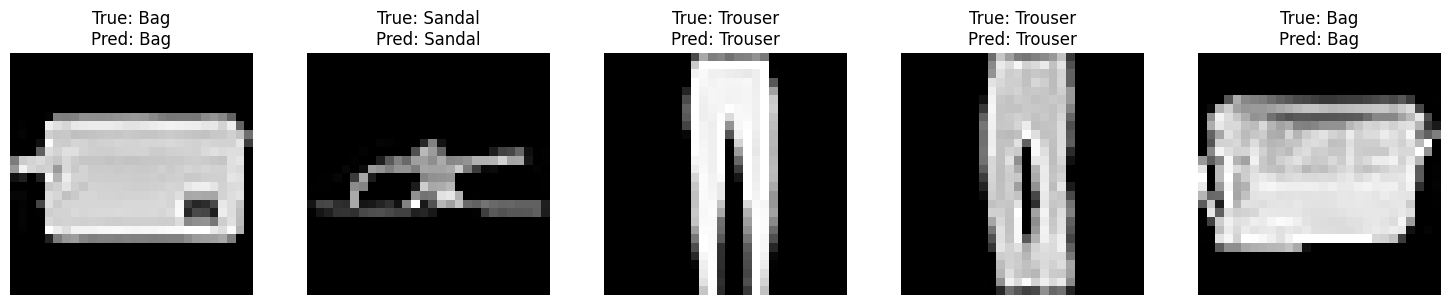

Accuracy for T-shirt/top: 89.60%
Accuracy for Trouser: 97.90%
Accuracy for Pullover: 91.10%
Accuracy for Dress: 96.00%
Accuracy for Coat: 84.20%
Accuracy for Sandal: 98.80%
Accuracy for Shirt: 63.10%
Accuracy for Sneaker: 95.90%
Accuracy for Bag: 97.10%
Accuracy for Ankle boot: 96.60%
Model saved to models/FashionMNIST_CNN_SM__cnn-fashion_mnist-e=25-lr=0001-wd=00001-es=5-dr=05__v1.0.0.pth


In [ ]:
fashion_mnist_cnn = FashionMNIST_CNN_SM(
    tags="cnn/fashion_mnist/e=25/lr=0001/wd=00001/es=5/dr=05", dropout_rate=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=25, lr=0.001, weight_decay=1e-4, early_stopping_patience=5
)

fashion_mnist_cnn.save_model(version="1.0.0")

##### Покращення моделі

1. Збільшення обсягу даних за рахунок аугментації:

Додати більш складні трансформації (наприклад, випадковий шум, масштабування або яскравість), щоб модель навчилася краще розпізнавати сорочки та светри.

In [25]:
batch_size = 64

transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1/10, Train Loss: 0.5484, Test Loss: 0.4099, Accuracy: 0.8512
Epoch 2/10, Train Loss: 0.3727, Test Loss: 0.3754, Accuracy: 0.8619
Epoch 3/10, Train Loss: 0.3276, Test Loss: 0.3380, Accuracy: 0.8757
Epoch 4/10, Train Loss: 0.3007, Test Loss: 0.3254, Accuracy: 0.8791
Epoch 5/10, Train Loss: 0.2829, Test Loss: 0.3322, Accuracy: 0.8794
Epoch 6/10, Train Loss: 0.2688, Test Loss: 0.3075, Accuracy: 0.8899
Epoch 7/10, Train Loss: 0.2571, Test Loss: 0.2764, Accuracy: 0.8997
Epoch 8/10, Train Loss: 0.2472, Test Loss: 0.2839, Accuracy: 0.8955
Epoch 9/10, Train Loss: 0.2401, Test Loss: 0.2794, Accuracy: 0.8982
Early stopping triggered at epoch 10


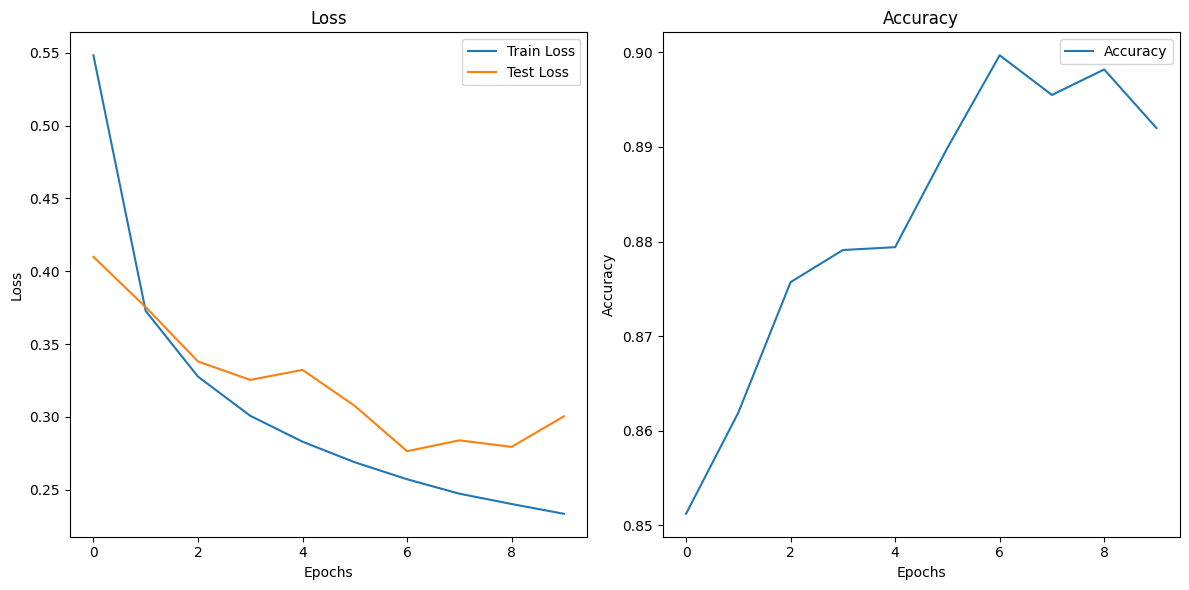

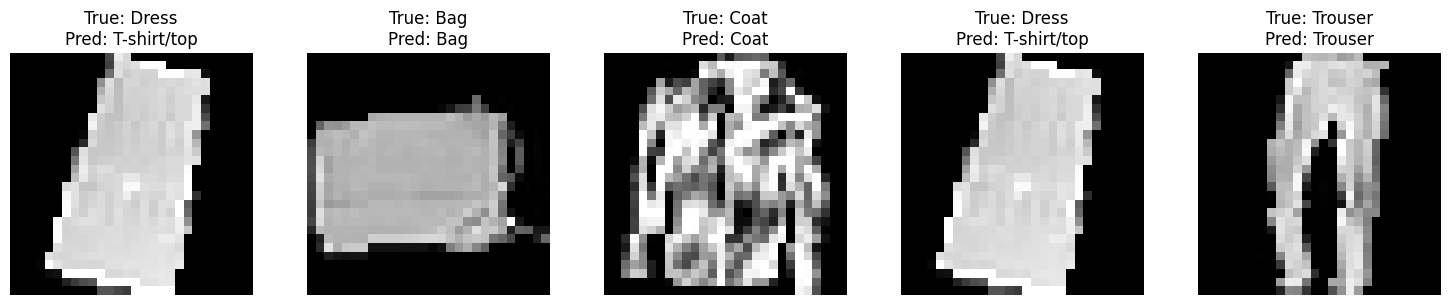

Accuracy for T-shirt/top: 87.80%
Accuracy for Trouser: 98.30%
Accuracy for Pullover: 92.60%
Accuracy for Dress: 90.40%
Accuracy for Coat: 67.40%
Accuracy for Sandal: 95.20%
Accuracy for Shirt: 68.60%
Accuracy for Sneaker: 95.70%
Accuracy for Bag: 98.90%
Accuracy for Ankle boot: 96.00%
Model saved to models/FashionMNIST_CNN__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj__v1.0.0.pth


In [9]:
fashion_mnist_cnn = FashionMNIST_CNN(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

2. Покращення архітектури:

Додамо ще один згортковий шар для глибшого виділення ознак

In [14]:
class FashionMNIST_CNN_Enh(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist/enh"):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = None
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc1 is None:
            self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 128)
            self.add_module("fc1", self.fc1)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch 1/10, Train Loss: 0.6322, Test Loss: 0.4956, Accuracy: 0.8188
Epoch 2/10, Train Loss: 0.4254, Test Loss: 0.4311, Accuracy: 0.8463
Epoch 3/10, Train Loss: 0.3754, Test Loss: 0.3850, Accuracy: 0.8613
Epoch 4/10, Train Loss: 0.3478, Test Loss: 0.3649, Accuracy: 0.8729
Epoch 5/10, Train Loss: 0.3280, Test Loss: 0.3385, Accuracy: 0.8829
Epoch 6/10, Train Loss: 0.3131, Test Loss: 0.3388, Accuracy: 0.8762
Epoch 7/10, Train Loss: 0.3010, Test Loss: 0.3212, Accuracy: 0.8808
Epoch 8/10, Train Loss: 0.2922, Test Loss: 0.3173, Accuracy: 0.8865
Epoch 9/10, Train Loss: 0.2820, Test Loss: 0.3155, Accuracy: 0.8850
Epoch 10/10, Train Loss: 0.2753, Test Loss: 0.3166, Accuracy: 0.8863


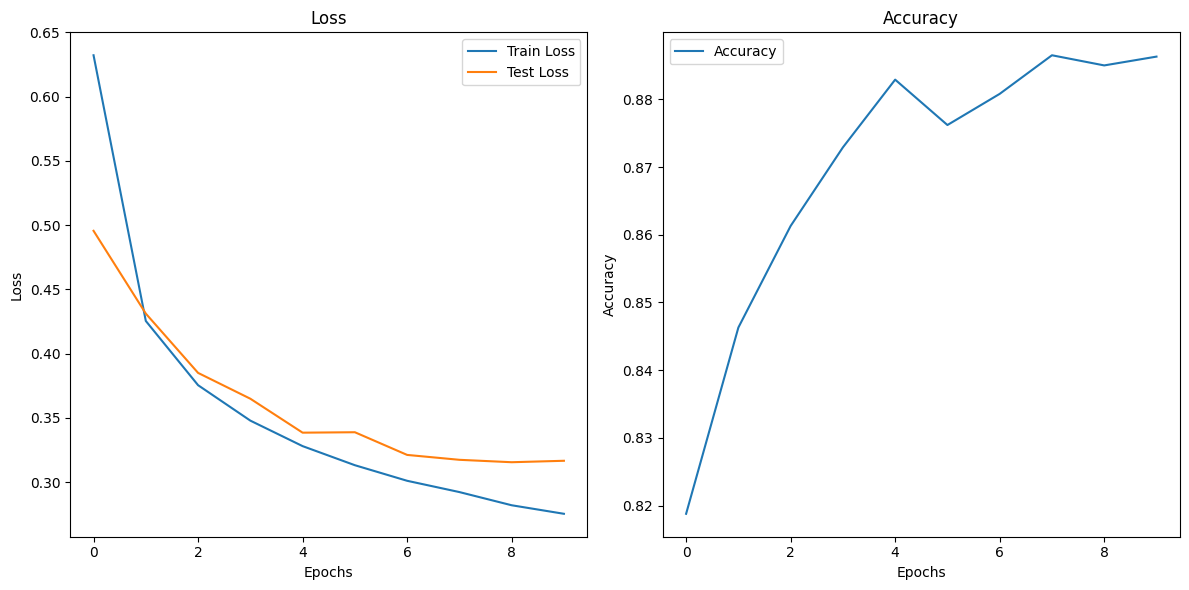

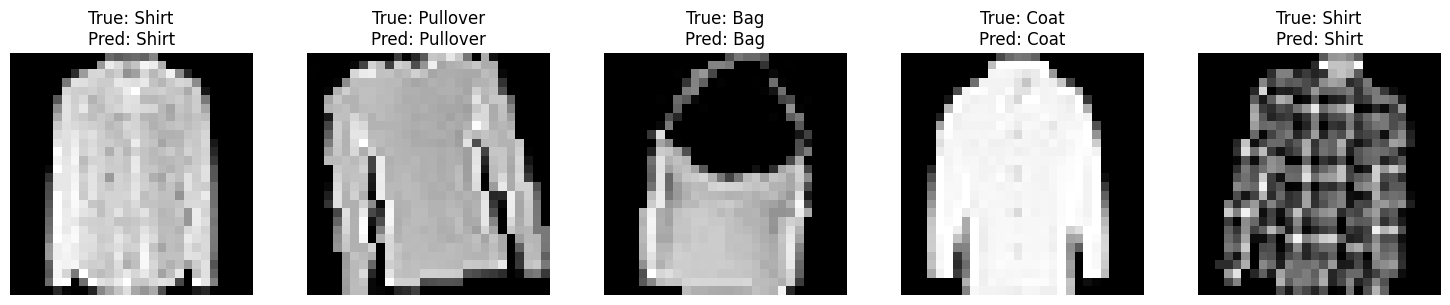

Accuracy for T-shirt/top: 80.30%
Accuracy for Trouser: 95.90%
Accuracy for Pullover: 87.10%
Accuracy for Dress: 90.20%
Accuracy for Coat: 82.60%
Accuracy for Sandal: 91.70%
Accuracy for Shirt: 72.40%
Accuracy for Sneaker: 98.10%
Accuracy for Bag: 95.20%
Accuracy for Ankle boot: 93.00%
Model saved to models/FashionMNIST_CNN_Enh__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj__v1.0.0.pth


In [15]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj"
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

3. Використання Dropout:

Додамо Dropout до повнозв’язних шарів для зменшення перенавчання

In [24]:
class FashionMNIST_CNN_Enh_DO(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist/enh/do", p_dropout=0.5):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p_dropout)
        self.fc1 = None
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc1 is None:
            self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 128)
            self.add_module("fc1", self.fc1)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Epoch 1/10, Train Loss: 0.7960, Test Loss: 0.5262, Accuracy: 0.8032
Epoch 2/10, Train Loss: 0.5590, Test Loss: 0.4677, Accuracy: 0.8265
Epoch 3/10, Train Loss: 0.5058, Test Loss: 0.4284, Accuracy: 0.8419
Epoch 4/10, Train Loss: 0.4683, Test Loss: 0.3952, Accuracy: 0.8522
Epoch 5/10, Train Loss: 0.4461, Test Loss: 0.3934, Accuracy: 0.8544
Epoch 6/10, Train Loss: 0.4249, Test Loss: 0.3754, Accuracy: 0.8616
Epoch 7/10, Train Loss: 0.4103, Test Loss: 0.3625, Accuracy: 0.8680
Epoch 8/10, Train Loss: 0.3986, Test Loss: 0.3448, Accuracy: 0.8740
Epoch 9/10, Train Loss: 0.3891, Test Loss: 0.3515, Accuracy: 0.8694
Epoch 10/10, Train Loss: 0.3769, Test Loss: 0.3278, Accuracy: 0.8811


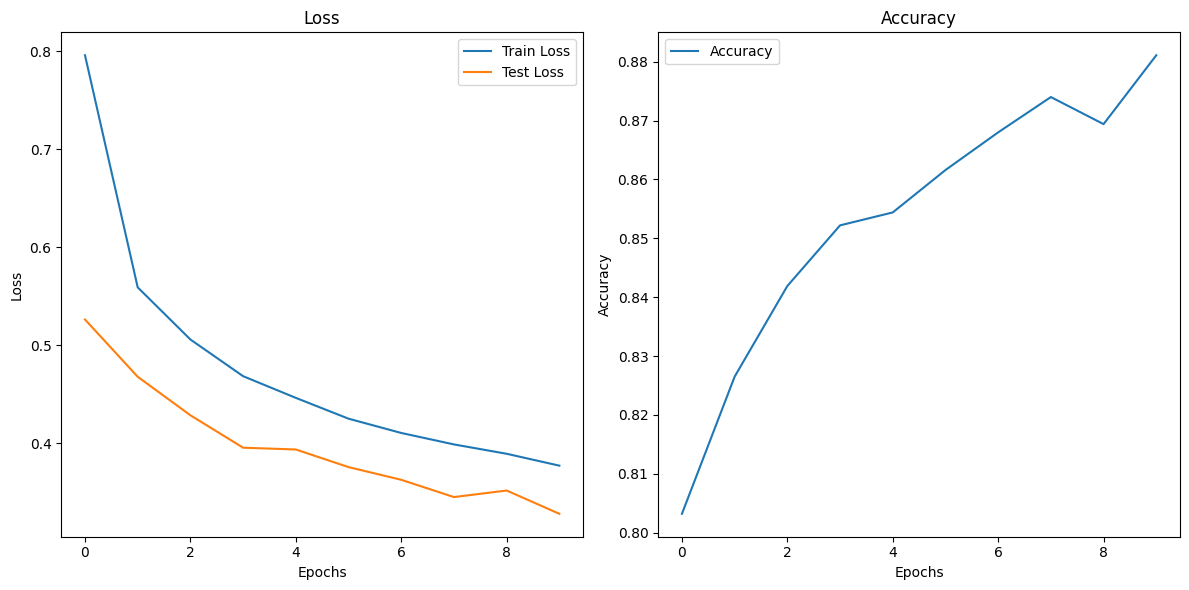

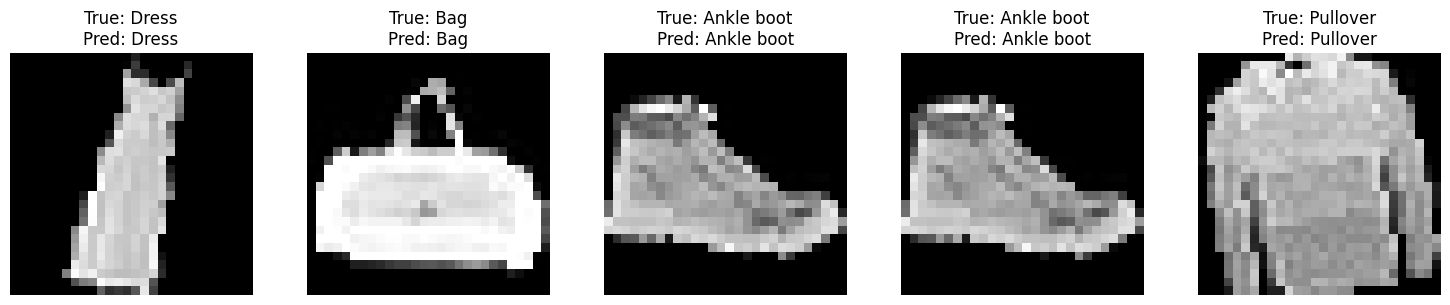

Accuracy for T-shirt/top: 78.50%
Accuracy for Trouser: 96.60%
Accuracy for Pullover: 76.80%
Accuracy for Dress: 88.10%
Accuracy for Coat: 86.50%
Accuracy for Sandal: 95.40%
Accuracy for Shirt: 67.10%
Accuracy for Sneaker: 95.50%
Accuracy for Bag: 96.80%
Accuracy for Ankle boot: 95.50%
Model saved to models/FashionMNIST_CNN_Enh_DO__cnn-fashion_mnist-e=10-lr=0001-wd=00001-es=3-rhf_rr_cj-pdo=05__v1.0.0.pth


In [17]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh_DO(
    tags="cnn/fashion_mnist/e=10/lr=0001/wd=00001/es=3/rhf_rr_cj/pdo=05", p_dropout=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=10, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

Додамо більше епох і збільшемо lerning rate на порядок

Epoch 1/25, Train Loss: 0.7973, Test Loss: 0.5295, Accuracy: 0.8018
Epoch 2/25, Train Loss: 0.5560, Test Loss: 0.4472, Accuracy: 0.8353
Epoch 3/25, Train Loss: 0.4889, Test Loss: 0.4108, Accuracy: 0.8454
Epoch 4/25, Train Loss: 0.4576, Test Loss: 0.3942, Accuracy: 0.8530
Epoch 5/25, Train Loss: 0.4286, Test Loss: 0.3719, Accuracy: 0.8647
Epoch 6/25, Train Loss: 0.4092, Test Loss: 0.3554, Accuracy: 0.8703
Epoch 7/25, Train Loss: 0.3935, Test Loss: 0.3363, Accuracy: 0.8763
Epoch 8/25, Train Loss: 0.3845, Test Loss: 0.3254, Accuracy: 0.8786
Epoch 9/25, Train Loss: 0.3701, Test Loss: 0.3322, Accuracy: 0.8787
Epoch 10/25, Train Loss: 0.3644, Test Loss: 0.3209, Accuracy: 0.8837
Epoch 11/25, Train Loss: 0.3573, Test Loss: 0.3260, Accuracy: 0.8815
Epoch 12/25, Train Loss: 0.3495, Test Loss: 0.3125, Accuracy: 0.8851
Epoch 13/25, Train Loss: 0.3428, Test Loss: 0.3195, Accuracy: 0.8836
Epoch 14/25, Train Loss: 0.3408, Test Loss: 0.3043, Accuracy: 0.8871
Epoch 15/25, Train Loss: 0.3351, Test Loss:

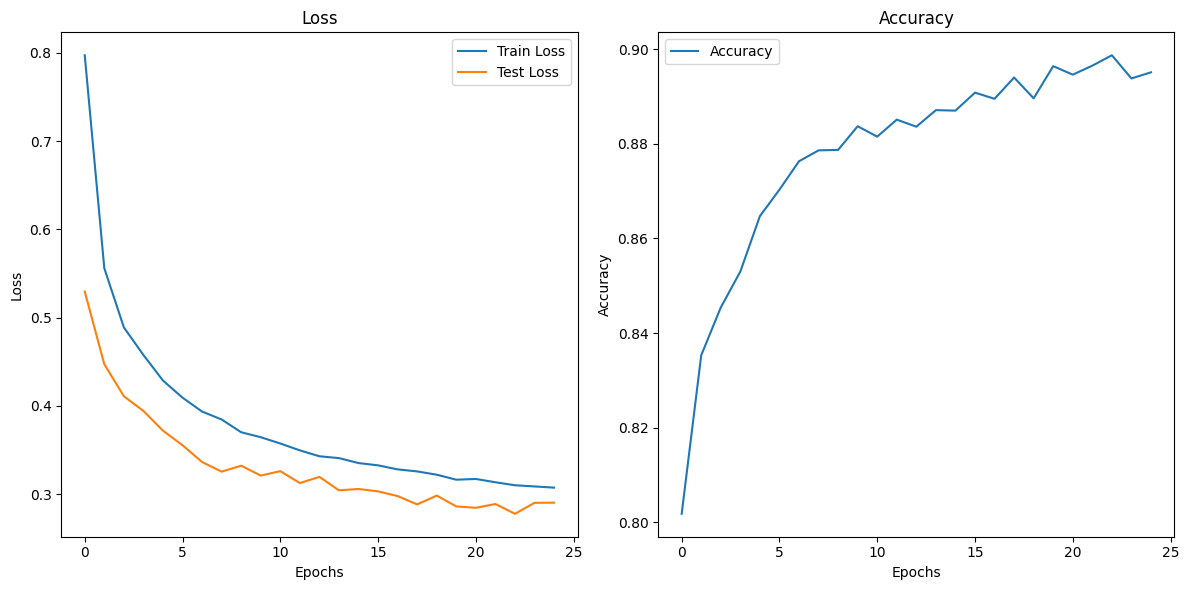

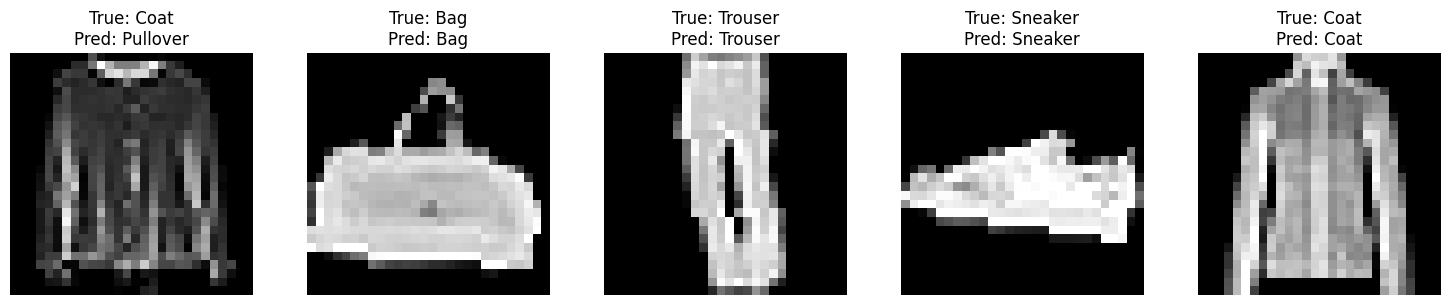

Accuracy for T-shirt/top: 87.20%
Accuracy for Trouser: 97.70%
Accuracy for Pullover: 88.70%
Accuracy for Dress: 89.50%
Accuracy for Coat: 77.00%
Accuracy for Sandal: 97.60%
Accuracy for Shirt: 72.20%
Accuracy for Sneaker: 94.90%
Accuracy for Bag: 97.80%
Accuracy for Ankle boot: 95.10%
Model saved to models/FashionMNIST_CNN_Enh_DO__cnn-fashion_mnist-e=25-lr=0001-wd=00001-es=3-rhf_rr_cj-pdo=05__v1.0.0.pth


In [27]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh_DO(
    tags="cnn/fashion_mnist/e=25/lr=0001/wd=00001/es=3/rhf_rr_cj/pdo=05", p_dropout=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=25, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")


##### **Подальше покращення**
###### - **Складніша аугментація**
- Додамо аугментації, які допоможуть моделі розпізнавати дрібні відмінності:
  ```python
  transforms.RandomAffine(degrees=20, scale=(0.8, 1.2), shear=10),
  transforms.RandomPerspective(distortion_scale=0.2),
  ```
- Це допоможе моделі краще виділяти унікальні ознаки.

###### - **Покращення архітектури**
- Додамо більше повнозв'язних шарів або збільшіть розмірності:
  ```python
  self.fc1 = nn.Linear(128 * 3 * 3, 256)
  self.fc2 = nn.Linear(256, 128)
  self.fc3 = nn.Linear(128, 10)
  ```
- Використаємо Dropout між кожним шаром:
  ```python
  x = self.dropout(F.relu(self.fc1(x)))
  ```

###### - **Використання інших оптимізаторів**
- Спробуємо оптимізатори, як-от **AdamW** або **RMSprop**, щоб зменшити втрати.

###### - **Більше епох**
- Продовжіть навчання до 20–30 епох із менш агресивними параметрами ранньої зупинки.


In [18]:
batch_size = 64

transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomAffine(degrees=20, scale=(0.8, 1.2), shear=10),
        transforms.RandomPerspective(distortion_scale=0.2),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
class FashionMNIST_CNN_Enh_DO_Wider(BaseNeuralNet):
    def __init__(self, tags="cnn/fashion_mnist/enh/do", p_dropout=0.5):
        super().__init__(tags=tags)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p_dropout)
        self.fc1 = None
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        if self.fc1 is None:
            self.fc1 = nn.Linear(x.view(x.size(0), -1).size(1), 256)
            self.add_module("fc1", self.fc1)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

Epoch 1/25, Train Loss: 1.0081, Test Loss: 0.6912, Accuracy: 0.7347
Epoch 2/25, Train Loss: 0.7537, Test Loss: 0.6356, Accuracy: 0.7542
Epoch 3/25, Train Loss: 0.6882, Test Loss: 0.5802, Accuracy: 0.7743
Epoch 4/25, Train Loss: 0.6430, Test Loss: 0.5429, Accuracy: 0.7937
Epoch 5/25, Train Loss: 0.6065, Test Loss: 0.5233, Accuracy: 0.8033
Epoch 6/25, Train Loss: 0.5856, Test Loss: 0.5029, Accuracy: 0.8084
Epoch 7/25, Train Loss: 0.5646, Test Loss: 0.4825, Accuracy: 0.8172
Epoch 8/25, Train Loss: 0.5536, Test Loss: 0.4627, Accuracy: 0.8276
Epoch 9/25, Train Loss: 0.5444, Test Loss: 0.4513, Accuracy: 0.8290
Epoch 10/25, Train Loss: 0.5299, Test Loss: 0.4627, Accuracy: 0.8287
Epoch 11/25, Train Loss: 0.5236, Test Loss: 0.4433, Accuracy: 0.8300
Epoch 12/25, Train Loss: 0.5147, Test Loss: 0.4533, Accuracy: 0.8294
Epoch 13/25, Train Loss: 0.5096, Test Loss: 0.4459, Accuracy: 0.8329
Epoch 14/25, Train Loss: 0.5072, Test Loss: 0.4377, Accuracy: 0.8380
Epoch 15/25, Train Loss: 0.5000, Test Loss:

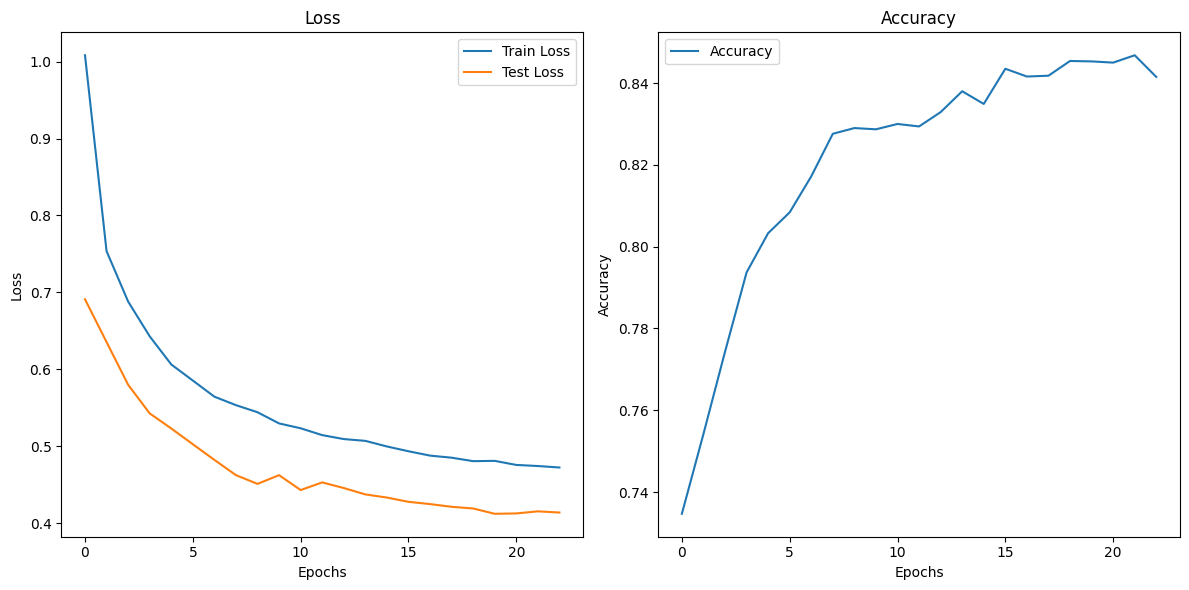

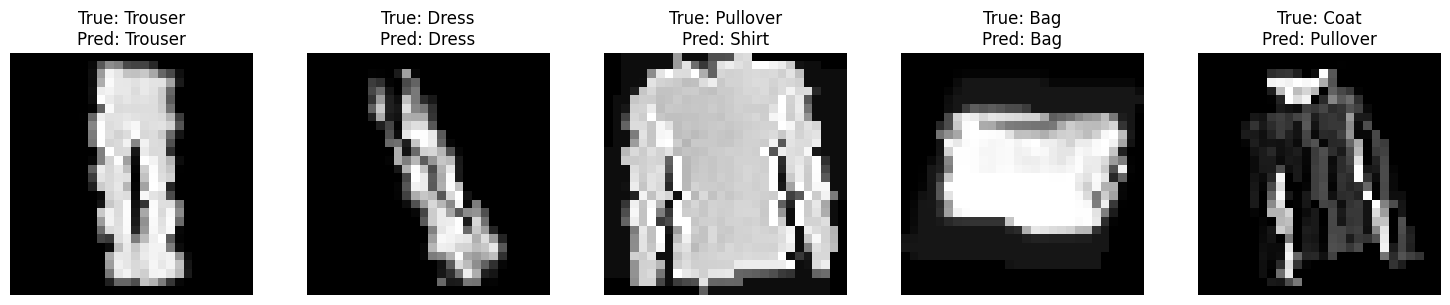

Accuracy for T-shirt/top: 82.80%
Accuracy for Trouser: 96.40%
Accuracy for Pullover: 72.70%
Accuracy for Dress: 87.30%
Accuracy for Coat: 83.90%
Accuracy for Sandal: 91.90%
Accuracy for Shirt: 43.10%
Accuracy for Sneaker: 94.90%
Accuracy for Bag: 96.30%
Accuracy for Ankle boot: 92.10%
Model saved to models/FashionMNIST_CNN_Enh_DO_Wider__cnn-fashion_mnist-e=25-lr=0001-wd=00001-es=3-rhf_rr_cj_ra_rp-pdo=05__v1.0.0.pth


In [20]:
fashion_mnist_cnn = FashionMNIST_CNN_Enh_DO_Wider(
    tags="cnn/fashion_mnist/e=25/lr=0001/wd=00001/es=3/rhf_rr_cj_ra_rp/pdo=05", p_dropout=0.5
)
fashion_mnist_cnn.init_datasets(train_dataset, test_dataset)
fashion_mnist_cnn.init_loaders(train_loader, test_loader)

fashion_mnist_cnn.train_model(
    epochs=25, lr=0.001, weight_decay=1e-4, early_stopping_patience=3
)

fashion_mnist_cnn.save_model(version="1.0.0")

## Висновки (або щось типу того)

В роботі наведено побудову і вдосконалення згорткової нейронної мережі (CNN) для класифікації зображень з використанням набору даних Fashion-MNIST. Основні висновки:

1. **Побудова базової моделі:**
   - Використано два згорткові шари, кожен із функцією активації ReLU, пулінгом і двома повнозв’язаними шарами.
   - Результати: модель досягла точності ≈91.6% після 10 епох із застосуванням ранньої зупинки.

2. **Вплив додаткових параметрів:**
   - **Dropout:** Додавання Dropout зменшило перенавчання, проте точність залишилася в межах 87–89%.
   - **Аугментація даних:** Застосування обертання, дзеркального відображення та інших трансформацій покращило узагальнення, проте результати для складних класів, таких як сорочки, залишилися низькими.

3. **Поетапне вдосконалення архітектури:**
   - **Додавання третього згорткового шару:** Покращило точність для деяких класів, але загальне покращення було незначним.
   - **Розширення повнозв'язаних шарів:** Збільшення розмірностей повнозв’язаних шарів у комбінації з Dropout сприяло поліпшенню узагальнення.

4. **Проблемні класи:**
   - Точність для класу "Shirt" залишалася найнижчою навіть після вдосконалень, що свідчить про потребу в додатковій аугментації або зміні підходу до обробки цього класу.
